In [1]:
#importing the required libraries for doing this task
import pandas as pd
import os
import glob
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


# <center>***PREPROCESSING***</center>

### 1.Dealing data sensibly


* One of the file they didn't mention year this makes difficult for pandas to make the date column to single format so we edit it by using excel.
 

* The names of Type and occupancy columns are intergchanged in one of the files so by using excel they are changed back to their original names.

* In one of the file they entered 'qm' instead of 'am' ,it is changed by using excel.

* In one the file, occupancy of all types is mentioned in percentage.It is changed by multiplying two rows(formulae=c2*d2) and the obtained output is named as occupancy and the old column is deleted. we multiply because in this file they took additional data as capacity, so the occupancy and additional data is multiplied to get the value.(The formulae can be changed to value by copy the all the cells and use paste special -paste values to get values).

* In one of the file they mentioned only date with no other values in that row ,that row is deleted using excel.

* In one of the file the value of BIKE is changed from 100 to 1.

* In two files for bus occupancy 'empty', 'half-full', 'medium' is changed to '0%', '50%', '50%' respectively.

In [2]:
# # **********make sure you run this cell only once***************
# #one of the file is separated by semicolon to convert it into required format(Comma separated).
# #we use the below code
# df =pd.read_csv('x.csv', sep=';')#reading the file(change file names as per your needs)
# df.insert(1,'Date','26-10-2022')#adding  a column
# df=df.iloc[2:,1:]#selcting only the required column
# df= df.rename({'Unnamed: 1': 'Time','Unnamed: 2': 'Direction','Unnamed: 3': 'Type','Unnamed: 4': 'Occupancy','Unnamed: 5': 'TYPE OF TRANSPORTATION'}, axis=1)  # changing the name of the column to match to our specs
# df=df.dropna()#removes the rows that contains NULL values
# df=df.reset_index(inplace=False)# reset the index and start from 0
# df=df.iloc[:,1:]#making final selction of columns
# df.to_csv('x.csv',index=False)#saving the final file in the same directory
# #if you use differnt directory or path to read the files then copy paste the file to that directory or path
# #if you run twice you will lose the data

#### 2. MERGING THE FILES

In [3]:
#list all csv files only
csv_files = glob.glob('C:\\Users\\Sainad\\Desktop\\GITHUB\\Project-1\\Code\\*csv')
csv_files

['C:\\Users\\Sainad\\Desktop\\GITHUB\\Project-1\\Code\\22351432.csv',
 'C:\\Users\\Sainad\\Desktop\\GITHUB\\Project-1\\Code\\22351433.csv',
 'C:\\Users\\Sainad\\Desktop\\GITHUB\\Project-1\\Code\\22351434.csv',
 'C:\\Users\\Sainad\\Desktop\\GITHUB\\Project-1\\Code\\22351435.csv',
 'C:\\Users\\Sainad\\Desktop\\GITHUB\\Project-1\\Code\\22351436.csv',
 'C:\\Users\\Sainad\\Desktop\\GITHUB\\Project-1\\Code\\22351439.csv',
 'C:\\Users\\Sainad\\Desktop\\GITHUB\\Project-1\\Code\\22351440.csv',
 'C:\\Users\\Sainad\\Desktop\\GITHUB\\Project-1\\Code\\22351441.csv',
 'C:\\Users\\Sainad\\Desktop\\GITHUB\\Project-1\\Code\\22351444.csv',
 'C:\\Users\\Sainad\\Desktop\\GITHUB\\Project-1\\Code\\22351445.csv',
 'C:\\Users\\Sainad\\Desktop\\GITHUB\\Project-1\\Code\\22351446.csv',
 'C:\\Users\\Sainad\\Desktop\\GITHUB\\Project-1\\Code\\22351449.csv',
 'C:\\Users\\Sainad\\Desktop\\GITHUB\\Project-1\\Code\\22351450.csv',
 'C:\\Users\\Sainad\\Desktop\\GITHUB\\Project-1\\Code\\22351453.csv',
 'C:\\Users\\Sainad\

In [4]:
# In order to merge data we need all the columns names of similiar data to be same so that we get proper results so we merge by
# changing the names of columns.

merge_data=pd.DataFrame() #creating an empty dataframe using pandas
for f in csv_files:
    x=pd.read_csv(f) #reading every csv file
    
    #changing different date column names to single format
    x=x.rename({'Data':'Date','6':'Date','Date':'Date','date':'Date'},axis=1)
    
    #changing different time column names to single format
    x=x.rename({'time':'Time','Time ( in AM)':'Time','TIME':'Time',' Time':'Time','Time ':'Time'},axis=1)
    
    #changing different direction column names to single format
    x=x.rename({'direction':'Direction','Direction of Vehicle':'Direction',' Direction':'Direction','Direction of travel':'Direction'},axis=1)
    
    #changing different type column names to single format
    x=x.rename({' type':'Type','category':'Type','type':'Type','Type of Vehicle':'Type',' Type':'Type','Vehicle Type':'Type','Category of vehicle':'Type','TYPE':'Type'},axis=1)
    
    #changing different occupancy column names to single format
    x=x.rename({'occupancy':'Occupancy','Occupancy':'Occupancy','occupancy':'Occupancy',' Occupancy':'Occupancy','Occupancy of the Vehicle':'Occupancy','OCCUPANCY':'Occupancy'},axis=1)
    
    #The additional data with different column names is changed to single format
    x=x.rename({'TYPE OF TRANSPORTATION':'TRANSPORT TYPE (Public/Private)','Transportation Type':'TRANSPORT TYPE (Public/Private)','Public Transport':'TRANSPORT TYPE (Public/Private)','Owner':'TRANSPORT TYPE (Public/Private)','Personal':'TRANSPORT TYPE (Public/Private)','Transport Type (Public/Private)':'TRANSPORT TYPE (Public/Private)'},axis=1)
    x=x.rename({'DirectionofExit':'DIRECTION OF EXIT','Approach/exit':'DIRECTION OF EXIT'},axis=1)
    x=x.rename({'Electric or Hybrid?':'ELECTRIC/HYBRID','Engine':'ELECTRIC/HYBRID'},axis=1)
    x=x.rename({'BusNo':'U1/U2',' Bus Type':'U1/U2'},axis=1)
    x=x.rename({'Colour of Vehicle':'VEHICLE COLOUR','Colour':'VEHICLE COLOUR','Vehicle Colour':'VEHICLE COLOUR'},axis=1)
    x=x.rename({'Cumulative frequency':'FREQUENCY','Frequency':'FREQUENCY' },axis=1)
    x=x.rename({'No of pedestrian':'PEDESTRIAN COUNT','Pedestrian Count':'PEDESTRIAN COUNT' },axis=1)
    x=x.rename({' Vehicle Brand':'BRAND OF THE VEHICLE','Vehicle Brand':'BRAND OF THE VEHICLE','Brand':'BRAND OF THE VEHICLE','Car Company/Bus No':'BRAND OF THE VEHICLE'},axis=1)
    x=x.rename({'Weather':'WEATHER',' Weather':'WEATHER'},axis=1)
    x=x.rename({'Electric or not': 'ELECTRIC VEHICLE','Electric / Non-Electric Vehicle': 'ELECTRIC VEHICLE',' Electric Vehicle':'ELECTRIC VEHICLE', 'Electric Vehicle ':'ELECTRIC VEHICLE','not_petrol':'ELECTRIC VEHICLE','Exhaust Pipe':'ELECTRIC VEHICLE','Electric':'ELECTRIC VEHICLE','Electric_vehicle':'ELECTRIC VEHICLE',' Electric_Vehicle':'ELECTRIC VEHICLE','CarType':'ELECTRIC VEHICLE','Engine Type':'ELECTRIC VEHICLE','FUEL':'ELECTRIC VEHICLE','Electric Vehicle':'ELECTRIC VEHICLE'},axis=1)
    x=x.rename({'driver‘s gender':"DRIVER'S GENDER",'Gender of the driver':"DRIVER'S GENDER",'Gender':"DRIVER'S GENDER",' Driver Gender':"DRIVER'S GENDER",'GENDER OF DRIVER':"DRIVER'S GENDER","Driver's gender":"DRIVER'S GENDER",'Bus driver gender':"DRIVER'S GENDER","Driver's Gender":"DRIVER'S GENDER"},axis=1)
    merge_data=pd.concat([merge_data,x])  #merging the data using concat
    merge_data=merge_data.dropna(axis=0,how='all') #drop the Rows that has all null values
    
# reset the index after combining total data without using one of the column as index(means dropping the old index)    
merge_data=merge_data.reset_index(drop=True)

#### 3.DATE

In [5]:
#after merging, changing the date of all columns to single format and keeping only date in that column using dt.date by removing time
merge_data['Date'] =pd.to_datetime(merge_data['Date'],infer_datetime_format=True,errors='raise').dt.date

#### 4.DIRECTION

In [6]:
#after merging ,in direction column we have quotation mark to fill that with above value we use forwardfill(ffill())
merge_data['Direction'] = merge_data['Direction'].mask(merge_data['Direction'] == '"').ffill()

# we have different style char in Direction column and with some spaces so, we remove that spaces and make all style same

#stripping all the spaces
merge_data['Direction']=merge_data['Direction'].str.strip()

#changing differnt style to same style using lower ()
merge_data['Direction']=merge_data['Direction'].apply(lambda D:D.lower())

#### 5.TIME

In [7]:
#after merging,we have dot stead of colon for time.To change it to colon we do following thing
merge_data['Time'] = merge_data['Time'].str.replace('.',':')# change from dot to colon

#In Time column we have quotation mark to fill that with above value we use forwardfill(ffill())
merge_data['Time']=merge_data['Time'].str.strip()# strip all the values to remove spaces since we have quotation marks with spaces
merge_data['Time'] = merge_data['Time'].mask(merge_data['Time'] == '"').ffill()

# we have 'pm' in our time coloumn but according to specs we dont need that,so we drop 'pm' using below procedure
merge_data['Time']=merge_data['Time'].astype('str')#first make the time column to string
merge_data=merge_data[ ~merge_data.Time.str.contains('|'.join(['pm'])) ]#drop rows that contain the partial string "pm" in the time column we use partial because we time is difference in each row

#according to specs we need time to nearest 5min 
merge_data['Time']=pd.to_datetime(merge_data['Time'])# we make time coloumn to datetime format in order to make it to nearest 5min by using floor function
merge_data['Time']=merge_data['Time'].dt.floor("5min")

#after everthing is one format we keep only time in that column using dt.time by removing date
merge_data['Time'] = pd.to_datetime(merge_data['Time'],errors='coerce').dt.time

#### 6.TYPE

In [8]:
# we have different style char in type column and with some spaces so, we remove that spaces and make all style same

#stripping all the spaces
merge_data['Type']=merge_data['Type'].str.strip()

#changing differnt names of same type to same name using replace
merge_data['Type']=merge_data['Type'].replace(['Electric Car'],['car'])
merge_data['Type']=merge_data['Type'].replace(['Motor Bike','motorcycle','moto','motor bike'],['motorbike','motorbike','motorbike','motorbike'])
merge_data['Type']=merge_data['Type'].replace(['bike','BIKE'],['bicycle','bicycle'])
merge_data['Type']=merge_data['Type'].replace(['lorry','Truck','truck','TRUCK'],['lorry','lorry','lorry','lorry'])

# In specs only above data is told to mention so rest is made into other
merge_data['Type']=merge_data['Type'].replace(['scooter','e-scooter','escooter','Scooters','Electric Bike','other','tractor','Pedestrian'],['other','other','other','other','other','other','other','other'])

#changing differnt style to same style using lower ()
merge_data['Type']=merge_data['Type'].apply(lambda T:T.lower())


#### 7.Occupancy

In [9]:
# Some of the rows in Occupancy have values in percentage so, we convert them into numbers.

merge_data['Occupancy'] = merge_data['Occupancy'].astype('str')#making the column values as string
merge_data['Occupancy'] = merge_data['Occupancy'].str.strip('%')# stripping the % symbol using strip to make all string numbers

# writing the loop to make pecentage to number 
for ind in merge_data.index:
    # converting the string to integer and comparing the value if it's greater than 10 multiplying it with 0.05 to make it to value of occupancy 5(considering car or taxi max capacity as 5) 
    if (merge_data['Type'][ind]=='car'or merge_data['Type'][ind]=='taxi') and (int(float(merge_data['Occupancy'][ind] )>= 10)):
        merge_data["Occupancy"][ind]=(int(float(merge_data["Occupancy"][ind]) * 0.05))
    # converting the string to integer and comparing the value if it's greater than 10 multiplying it with 0.04 to make it to value of occupancy 4(considering van or lorry max capacity as 4)
    if (merge_data['Type'][ind]=='van' or merge_data['Type'][ind]=='lorry') and (int(float(merge_data['Occupancy'][ind] )>= 10)):
        merge_data["Occupancy"][ind]=(int(float(merge_data["Occupancy"][ind]) * 0.04))
    # multiplying the value with 0.87 to get a max capacity of 87
    if merge_data['Type'][ind]=='bus':
        merge_data["Occupancy"][ind]=int(float(merge_data["Occupancy"][ind])*0.87)

In [10]:
# since there is no data in these columns so, dropping them by using drop function
merge_data=merge_data.drop(["AdditionalData2", "Unnamed: 0","Unnamed: 6"], axis = 1)


# <center>***VISUALIZATION***</center>

### Q:Are electric cars future?

#### 1.ELECTRIC VEHICLE

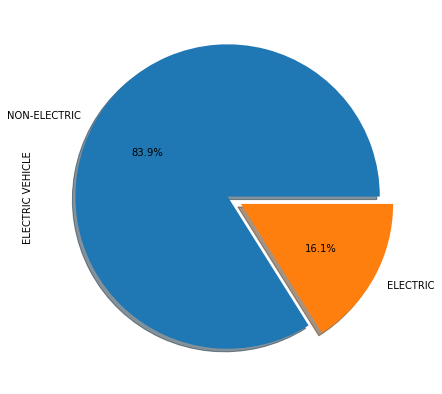

In [11]:
# making all the names in the row to 'NON-ELECTRIC' or 'ELECTRIC' by using replace
merge_data["ELECTRIC VEHICLE"]=merge_data["ELECTRIC VEHICLE"].replace(['+','absent','conventional',1,'yes','electric','Electric','Hybrid','Yes', ' True','No Engine','Electrics','ELECTRIC'],['ELECTRIC','ELECTRIC','ELECTRIC','ELECTRIC','ELECTRIC','ELECTRIC','ELECTRIC','ELECTRIC','ELECTRIC','ELECTRIC','ELECTRIC','ELECTRIC','ELECTRIC'])
merge_data["ELECTRIC VEHICLE"]=merge_data["ELECTRIC VEHICLE"].replace(['-','present',0,'no','Combustible','No','Gasoline','non-electric','GAS',' False'],['NON-ELECTRIC','NON-ELECTRIC','NON-ELECTRIC','NON-ELECTRIC','NON-ELECTRIC','NON-ELECTRIC','NON-ELECTRIC','NON-ELECTRIC','NON-ELECTRIC','NON-ELECTRIC'])
bull=merge_data["ELECTRIC VEHICLE"].dropna()
plt.figure(figsize=(7,7))# mentioning the figure size
explode = (0, 0.1)#to make the pie chart edges buldge we give values i.e width
#labels='',''
bull.value_counts().plot(kind="pie",autopct="%1.1f%%",shadow=True, explode=explode)#,labels=labels)#plotting the pie graph
plt.savefig('ELECTRIC VEHICLE')

In [12]:
p=merge_data[merge_data['Type']=='car'].loc[:,['Type','ELECTRIC VEHICLE']]
p.value_counts()

Type  ELECTRIC VEHICLE
car   NON-ELECTRIC        954
      ELECTRIC            198
dtype: int64

#### 2.BRAND OF THE VEHICLE

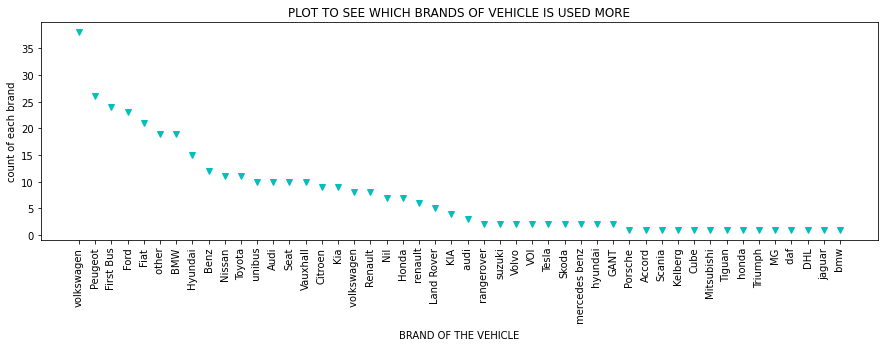

In [13]:
# making different vehicle version names to to single manufacturer by using replace
merge_data["BRAND OF THE VEHICLE"]=merge_data["BRAND OF THE VEHICLE"].replace(['unibus','U1','U2','U1`','First Bus'],['First Bus','First Bus','First Bus','First Bus','First Bus'])
merge_data["BRAND OF THE VEHICLE"]=merge_data["BRAND OF THE VEHICLE"].replace(['volkswagen','Volkswagen Polo','Volkswagen','Volkswagen Polo','Volkswagen Golf','VW'],['volkswagen','volkswagen','volkswagen','volkswagen','volkswagen','volkswagen'])
merge_data["BRAND OF THE VEHICLE"]=merge_data["BRAND OF THE VEHICLE"].replace(['audi','Audi','Audi A6','Audi Q5','Audi Q2'],['Audi','Audi','Audi','Audi','Audi'])
merge_data["BRAND OF THE VEHICLE"]=merge_data["BRAND OF THE VEHICLE"].replace(['mercedes benz','Benz','Mercedes A180D','Mercedes'],['Benz','Benz','Benz','Benz'])
merge_data["BRAND OF THE VEHICLE"]=merge_data["BRAND OF THE VEHICLE"].replace(['bmw','BMW',' mini','Mini Cooper','Mini'],['BMW','BMW','BMW','BMW','BMW'])
merge_data["BRAND OF THE VEHICLE"]=merge_data["BRAND OF THE VEHICLE"].replace(['renault','Renault Zoe','Renault Traffic','Renault','Sandero'],['Renault','Renault','Renault','Renault','Renault'])
merge_data["BRAND OF THE VEHICLE"]=merge_data["BRAND OF THE VEHICLE"].replace(['Opel Corsa','opel','Vauxhall','Corsa'],['Vauxhall','Vauxhall','Vauxhall','Vauxhall'])
merge_data["BRAND OF THE VEHICLE"]=merge_data["BRAND OF THE VEHICLE"].replace(['Swift','Suzuki'],['suzuki','suzuki'])
merge_data["BRAND OF THE VEHICLE"]=merge_data["BRAND OF THE VEHICLE"].replace(['Ibiza','Seat'],['Seat','Seat'])
merge_data["BRAND OF THE VEHICLE"]=merge_data["BRAND OF THE VEHICLE"].replace(['Peugeot','Peugeot Export'],['Peugeot','Peugeot'])
merge_data["BRAND OF THE VEHICLE"]=merge_data["BRAND OF THE VEHICLE"].replace(['Citoren','Citroen'],['Citroen','Citroen'])
merge_data["BRAND OF THE VEHICLE"]=merge_data["BRAND OF THE VEHICLE"].replace(['Toyota','Toyota RA4'],['Toyota','Toyota'])
merge_data["BRAND OF THE VEHICLE"]=merge_data["BRAND OF THE VEHICLE"].replace(['rangerover','Land Rover'],['Land Rover','Land Rover'])
merge_data["BRAND OF THE VEHICLE"]=merge_data["BRAND OF THE VEHICLE"].replace(['Volvo XC 40','Volvo'],['Volvo','Volvo'])
merge_data["BRAND OF THE VEHICLE"]=merge_data["BRAND OF THE VEHICLE"].replace(['CRV','Honda'],['Honda','Honda'])
merge_data["BRAND OF THE VEHICLE"]=merge_data["BRAND OF THE VEHICLE"].replace(['Ford','Ford Transit',' ford'],['Ford','Ford','Ford'])

df=merge_data.groupby(['BRAND OF THE VEHICLE'])['BRAND OF THE VEHICLE'].count().reset_index(name='count')# we are grouping data for of same manufacturer
df.sort_values('count',ascending=False,inplace=True)
plt.figure(figsize=(15,4))
plt.plot(df['BRAND OF THE VEHICLE'],df['count'],'v',color='c') #plotting the graph
plt.title('PLOT TO SEE WHICH BRANDS OF VEHICLE IS USED MORE') # giving the title
plt.xlabel('BRAND OF THE VEHICLE')
plt.ylabel('count of each brand')
plt.xticks(rotation = 90)#giving angle for x labels
plt.savefig('PLOT TO SEE WHICH BRANDS OF VEHICLE IS USED MORE') #saving the graph file

In [14]:
df.head()

,BRAND OF THE VEHICLE,count
47,volkswagen,38
32,Peugeot,26
19,First Bus,24
20,Ford,23
18,Fiat,21


# <center>***Saving Final Merged file***</center>

In [15]:
merge_data.to_excel('merge_data.xlsx',index=False)#to save final data 

## I completed the above code for the coursework within the given timeframe. Later, during my free time, a question arose about whether the same members could collect identical data simultaneously, leading to duplicates. In response, I attempted to remove the duplicates and re-did the visualizations.

### Q:Are electric cars future?

#### 1.ELECTRIC VEHICLE

### To achieve this, I first selected four columns (date, time, electric vehicles,type). Next, I removed all null values because not all rows contain data regarding electric vehicles. Then, I removed the duplicates using the drop_duplicates function, considering the date, time, and electric vehicle,type columns. If these four columns were the same, I removed the duplicates; otherwise, I kept them.

In [16]:
df1=merge_data
df1=merge_data.loc[:,['Date','Time','ELECTRIC VEHICLE','Type',"Direction"]]
df1=df1.dropna()
df1=df1.drop_duplicates(subset=["Date","Time","ELECTRIC VEHICLE","Type","Direction"])
df1

,Date,Time,ELECTRIC VEHICLE,Type
342,2022-10-26,10:20:00,NON-ELECTRIC,bus
343,2022-10-26,10:20:00,NON-ELECTRIC,bicycle
344,2022-10-26,10:20:00,NON-ELECTRIC,car
347,2022-10-26,10:20:00,ELECTRIC,van
348,2022-10-26,10:20:00,ELECTRIC,car
...,...,...,...,...
4216,2022-10-26,09:55:00,NON-ELECTRIC,bicycle
4230,2022-10-26,09:55:00,NON-ELECTRIC,lorry
4237,2022-10-26,10:00:00,ELECTRIC,car
4257,2022-10-26,10:05:00,ELECTRIC,car


<AxesSubplot:ylabel='ELECTRIC VEHICLE'>

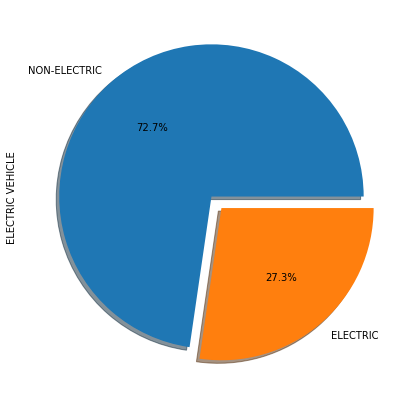

In [18]:
# making all the names in the row to 'NON-ELECTRIC' or 'ELECTRIC' by using replace
df1["ELECTRIC VEHICLE"]=df1["ELECTRIC VEHICLE"].replace(['+','absent','conventional',1,'yes','electric','Electric','Hybrid','Yes', ' True','No Engine','Electrics','ELECTRIC'],['ELECTRIC','ELECTRIC','ELECTRIC','ELECTRIC','ELECTRIC','ELECTRIC','ELECTRIC','ELECTRIC','ELECTRIC','ELECTRIC','ELECTRIC','ELECTRIC','ELECTRIC'])
df1["ELECTRIC VEHICLE"]=df1["ELECTRIC VEHICLE"].replace(['-','present',0,'no','Combustible','No','Gasoline','non-electric','GAS',' False'],['NON-ELECTRIC','NON-ELECTRIC','NON-ELECTRIC','NON-ELECTRIC','NON-ELECTRIC','NON-ELECTRIC','NON-ELECTRIC','NON-ELECTRIC','NON-ELECTRIC','NON-ELECTRIC'])
bull=df1["ELECTRIC VEHICLE"].dropna()
plt.figure(figsize=(7,7))# mentioning the figure size
explode = (0, 0.1)#to make the pie chart edges buldge we give values i.e width
#labels='',''
bull.value_counts().plot(kind="pie",autopct="%1.1f%%",shadow=True, explode=explode)#,labels=labels)#plotting the pie graph


In [19]:
p=df1[df1['Type']=='car'].loc[:,['Type','ELECTRIC VEHICLE']]
p.value_counts()

Type  ELECTRIC VEHICLE
car   NON-ELECTRIC        54
      ELECTRIC            44
dtype: int64

#### 2.BRAND OF THE VEHICLE

In [20]:
df2=merge_data.loc[:,['Date','Time','BRAND OF THE VEHICLE',"Type","Direction"]]
df2=df2.dropna()
df2=df2.drop_duplicates(subset=["Date","Time","BRAND OF THE VEHICLE","Type","Direction"])
df2

,Date,Time,BRAND OF THE VEHICLE
2330,2022-10-27,10:00:00,unibus
2331,2022-10-27,10:00:00,audi
2332,2022-10-27,10:00:00,renault
2333,2022-10-27,10:05:00,other
2334,2022-10-27,10:05:00,renault
...,...,...,...
4136,2022-10-26,09:50:00,Seat
4138,2022-10-26,09:50:00,volkswagen
4139,2022-10-26,09:50:00,Nil
4140,2022-10-26,09:50:00,BMW


<Figure size 1080x288 with 0 Axes>

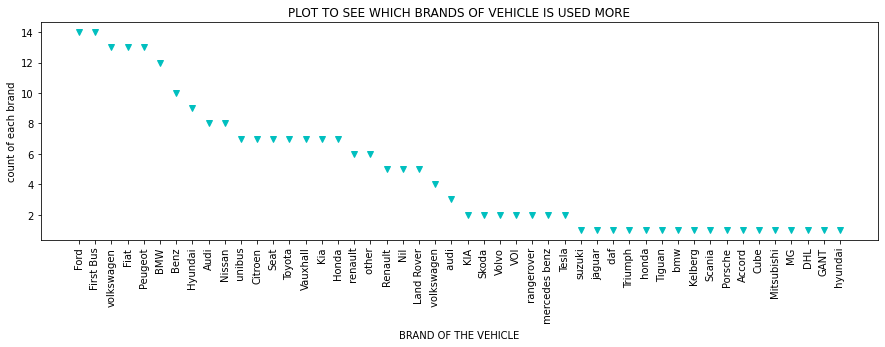

<Figure size 1080x288 with 0 Axes>

In [21]:
# making different vehicle version names to to single manufacturer by using replace
df2["BRAND OF THE VEHICLE"]=df2["BRAND OF THE VEHICLE"].replace(['unibus','U1','U2','U1`','First Bus'],['First Bus','First Bus','First Bus','First Bus','First Bus'])
df2["BRAND OF THE VEHICLE"]=df2["BRAND OF THE VEHICLE"].replace(['volkswagen','Volkswagen Polo','Volkswagen','Volkswagen Polo','Volkswagen Golf','VW'],['volkswagen','volkswagen','volkswagen','volkswagen','volkswagen','volkswagen'])
df2["BRAND OF THE VEHICLE"]=df2["BRAND OF THE VEHICLE"].replace(['audi','Audi','Audi A6','Audi Q5','Audi Q2'],['Audi','Audi','Audi','Audi','Audi'])
df2["BRAND OF THE VEHICLE"]=df2["BRAND OF THE VEHICLE"].replace(['mercedes benz','Benz','Mercedes A180D','Mercedes'],['Benz','Benz','Benz','Benz'])
df2["BRAND OF THE VEHICLE"]=df2["BRAND OF THE VEHICLE"].replace(['bmw','BMW',' mini','Mini Cooper','Mini'],['BMW','BMW','BMW','BMW','BMW'])
df2["BRAND OF THE VEHICLE"]=df2["BRAND OF THE VEHICLE"].replace(['renault','Renault Zoe','Renault Traffic','Renault','Sandero'],['Renault','Renault','Renault','Renault','Renault'])
df2["BRAND OF THE VEHICLE"]=df2["BRAND OF THE VEHICLE"].replace(['Opel Corsa','opel','Vauxhall','Corsa'],['Vauxhall','Vauxhall','Vauxhall','Vauxhall'])
df2["BRAND OF THE VEHICLE"]=df2["BRAND OF THE VEHICLE"].replace(['Swift','Suzuki'],['suzuki','suzuki'])
df2["BRAND OF THE VEHICLE"]=df2["BRAND OF THE VEHICLE"].replace(['Ibiza','Seat'],['Seat','Seat'])
df2["BRAND OF THE VEHICLE"]=df2["BRAND OF THE VEHICLE"].replace(['Peugeot','Peugeot Export'],['Peugeot','Peugeot'])
df2["BRAND OF THE VEHICLE"]=df2["BRAND OF THE VEHICLE"].replace(['Citoren','Citroen'],['Citroen','Citroen'])
df2["BRAND OF THE VEHICLE"]=df2["BRAND OF THE VEHICLE"].replace(['Toyota','Toyota RA4'],['Toyota','Toyota'])
df2["BRAND OF THE VEHICLE"]=df2["BRAND OF THE VEHICLE"].replace(['rangerover','Land Rover'],['Land Rover','Land Rover'])
df2["BRAND OF THE VEHICLE"]=df2["BRAND OF THE VEHICLE"].replace(['Volvo XC 40','Volvo'],['Volvo','Volvo'])
df2["BRAND OF THE VEHICLE"]=df2["BRAND OF THE VEHICLE"].replace(['CRV','Honda'],['Honda','Honda'])
df2["BRAND OF THE VEHICLE"]=df2["BRAND OF THE VEHICLE"].replace(['Ford','Ford Transit',' ford'],['Ford','Ford','Ford'])

df2=df2.groupby(['BRAND OF THE VEHICLE'])['BRAND OF THE VEHICLE'].count().reset_index(name='count')# we are grouping data for of same manufacturer
df2.sort_values('count',ascending=False,inplace=True)
plt.figure(figsize=(15,4))
plt.plot(df2['BRAND OF THE VEHICLE'],df2['count'],'v',color='c') #plotting the graph
plt.title('PLOT TO SEE WHICH BRANDS OF VEHICLE IS USED MORE') # giving the title
plt.xlabel('BRAND OF THE VEHICLE')
plt.ylabel('count of each brand')
plt.xticks(rotation = 90)#giving angle for x labels
plt.figure(figsize=(15,4))

In [22]:
df2.head()

,BRAND OF THE VEHICLE,count
20,Ford,14
19,First Bus,14
47,volkswagen,13
18,Fiat,13
32,Peugeot,13


# <center>***CONCLUSION***</center>

### Based on this data, an infographic was designed, and additional research was conducted, which is attached in this project. 
Note: The infographic may not be accurate because it was created before removing the duplicates. Also, in this folder, some data might be missing because it was removed to anonymize it and protect ethical considerations. Please review the design and structure of the infographic as it contains design elements rather than data